In [206]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


In [111]:
#Connecting Database
dataBase = sqlite3.connect("database.sqlite")

#get data frame
dfCountry = pd.read_sql_query("Select * from Country", dataBase)
dfLeague = pd.read_sql_query("Select * from League", dataBase)
dfMatch = pd.read_sql_query("Select * from Match", dataBase)
dfTeam = pd.read_sql_query("Select * from Team", dataBase)


In [112]:
#Detalle de Ligas por Paises
pd.concat(
    [dfCountry.set_index('id'),
     dfLeague.set_index('country_id')],
    axis=1, keys=('Country','League'))


Country League                          
              name     id                      name
1          Belgium      1    Belgium Jupiler League
1729       England   1729    England Premier League
4769        France   4769            France Ligue 1
7809       Germany   7809     Germany 1. Bundesliga
10257        Italy  10257             Italy Serie A
13274  Netherlands  13274    Netherlands Eredivisie
15722       Poland  15722        Poland Ekstraklasa
17642     Portugal  17642  Portugal Liga ZON Sagres
19694     Scotland  19694   Scotland Premier League
21518        Spain  21518           Spain LIGA BBVA
24558  Switzerland  24558  Switzerland Super League

In [193]:
#Evaluacion de equipo con mas goles
merged_inner = pd.merge(left=dfTeam,right=dfMatch, left_on='id', right_on='id')
dfGoal = merged_inner[["team_long_name", "home_team_goal", "away_team_goal"]]

def totalGoals(goals):
    sumGoals = goals["away_team_goal"] + goals["home_team_goal"]
    return sumGoals

dfGoal = dfGoal.copy()
dfGoal["total_goals"] = dfGoal.apply(totalGoals, axis=1)

grouped = dfGoal.groupby("team_long_name").sum()

grouped


home_team_goal  away_team_goal  total_goals
team_long_name                                                       
1. FC Kaiserslautern                   1               1            2
1. FC Köln                             1               3            4
1. FC Nürnberg                         2               2            4
1. FSV Mainz 05                        3               2            5
AC Ajaccio                             2               2            4
...                                  ...             ...          ...
West Bromwich Albion                   0               3            3
West Ham United                        2               1            3
Wigan Athletic                         0               0            0
Wolverhampton Wanderers                3               0            3
Évian Thonon Gaillard FC               5               1            6

[155 rows x 3 columns]

<AxesSubplot:xlabel='team_long_name'>

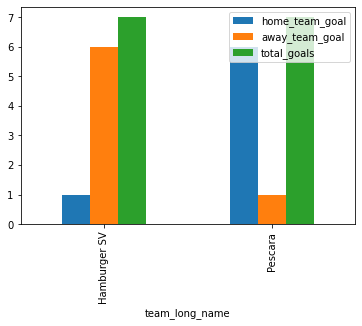

In [212]:
#Estadistica de los dos mejores goleadores
grouped[grouped["total_goals"] > 6].plot(kind="bar")  


In [194]:
#El equipo con mas goles en casa
grouped[grouped["total_goals"] > 6]


home_team_goal  away_team_goal  total_goals
team_long_name                                             
Hamburger SV                 1               6            7
Pescara                      6               1            7

In [203]:
#Podemos analizar teniendo una muestra de 155 datos, que hay mas posibilidades de meter mas
#goles en local. aparte en la desviacion no tenemos una gran dispersion de datos por ende el 
#resultado con respecto a la media, podriamos decir que es mas exacto. 
grouped.describe()


home_team_goal  away_team_goal  total_goals
count      155.000000      155.000000   155.000000
mean         1.703226        1.225806     2.929032
std          1.223016        1.102231     1.554673
min          0.000000        0.000000     0.000000
25%          1.000000        0.000000     2.000000
50%          2.000000        1.000000     3.000000
75%          2.000000        2.000000     4.000000
max          6.000000        6.000000     7.000000